# Test

Hello there! Congratulations on passing the previous test and welcome to this session. Before we started, here's some information regarding this test:

- You'll have 2 hours to finish this test.
- You have to answer **at least** 1 problem.
- Write down all assumptions needed.
- Please make sure that your codes are clean. (or at least readable)
- Please answer the question using a function.
- You are allowed to ask the proctor.
- Only `numpy` package is allowed.
    - You may ask the proctor if you want to use other packages.

## Problem 1

1. Given a dataset that consists of 2 columns and 500 rows.
    - Each rows represent an individual.
    - And each columns can be interpreted as a "feature" of an individual.
    - Now, you are asked to rank each individuals.
    - In this problem, we assume that low scores on both features are better.
    - Build a function to do the task

> Note: You may use any algorithms / methods that you know. If you don't know any, you may "invent" yourself as long as you only use `numpy`. Please write down all of the assumptions that you want to use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.loadtxt("https://gist.githubusercontent.com/fazaghifari/3b77115c8423c8521004200c252217ac/raw/2e57c375d8eda83a7c6ad492a823516f1759c058/dataset_test_1.csv", delimiter=',')
x1 = x[:,0]
x2 = x[:,1]

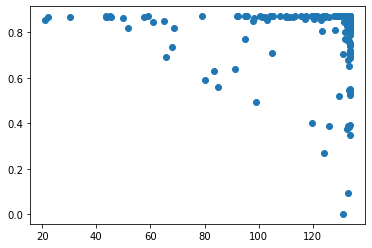

In [3]:
plt.scatter(x1,x2)

In [4]:
#dijumlah kedua array 
#sehingga pada waktu di sort bisa mencari dimana kedua fitur dari 
#identitasnya kecil
xtot = x1+x2

In [5]:
#di sort dari xtot dari paling kecil ke besar
temp = np.argsort(xtot)

In [6]:
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(xtot))
print(ranks)

[ 42 372 257  33  84 112 320  75 389  53 489 325 211 223 423 212 415  29
 467  40 224 146 407 251 114 110  28 351 370 437 143   4 397 283 330 354
 205 151 406 176 478 271  30 122  91 293  44 387  77  15 187  62  10 220
 424 386 448  58 120 279 298 343 375 203 360 102 322 248 409 170 492 309
 328 331 395 411 265 121 301 125 183 413 196 104 134 256 399 417 111 392
 356 144  95 119 135 230 463 185 180  61 127 339 491 168 365   3  47 455
 263 173  20 126 454 364 430 216 362 380 446  78  17 490 475 128  16 165
  25 280 260 219 332 226   5 451 474 369 179 306 357 295 267  67 228  18
  87 310 420 418   2 182 276 481 259 106 358  94   9 494 434 410  22  83
  45 250 155 191 470 158 485 241 427 359 334 194 466 473 340 133 202 275
 323 184 405 347 308 484  34 497 495 167 305 274 287  12  39 124 232 245
 174 199 361 190 193 314 436 488  63 462 486 439 469 282  72 132 264  65
 400 312 214  49  88 394 148 291 390 483 147 456 344 234 383 438 207 206
 498 107 333  11 161 371 402 240 109 408 349 204 21

## Problem 2
2. Given a dataset that consists of 7 columns and 500 rows.
    - Each row represent a data point with 7 dimensions.
    - Now, find the median of those 500 data points.
    - For this task you may use the definition of [medoid](https://en.wikipedia.org/wiki/Medoid)   
$$
\arg \min_{\boldsymbol{z} \in X} \sum_{i=1}^n || \boldsymbol{z} - \boldsymbol{x}_i||
$$

> Note: You may use `scipy` for the optimizer, if you need any.

In [7]:
x = np.loadtxt("https://gist.githubusercontent.com/fazaghifari/b58ec5d4ce43a803f1bbaa9df4e694a1/raw/0b5d74f5a025eef277f7ceb6ff4ec5c28dcc3386/dataset_test_2.csv", delimiter=',')
x[:5,:]

array([[ 56.,   4.,   0.,  27., 149., 116., 139.],
       [ 54., 151., 109., 113.,  75.,  92.,  93.],
       [ 39., 113.,  86.,  83.,  91.,  39.,  28.],
       [140.,  35.,  73., 144., 125.,  56.,  13.],
       [  1.,  32.,  84.,  92., 107.,  87.,  24.]])

In [8]:
def medoid(x):
    d = x.T[:, None, :] - x.T
    #distance
    s = np.einsum('ijk,ijk->ij', d, d)
    #rumus medoid
    index = np.argmin(np.sum(np.sqrt(s), axis=1))
    return x[index, :]

In [9]:
print(medoid(x))

[ 35.  10.  63. 129.  20.  99.  61.]


## Problem 3

3. You are drawing from a Normally Distributed random variable $X \sim N(0,1)$ once a day. What is the approximate expected number of days until you get a value of more than 2?

> Write a function to proof your answer. This can be done using `numpy` only.

In [10]:
#total hari
total = 0
#dilakukan 100000 percobaan
for x in range(100000):
    val = 0
    days = 0
    #selama val masih dibawah 2 hari ditambahkan
    while val < 2:
        days = days+1
        val = np.random.normal(0,1)
    total += days

In [11]:
print("Dari percobaan 100000 kali, ditemukan bahwa dibutuhkan rata-rata "+ str(total/100000) + " hari untuk mendapatkan value lebih dari 2" )

Dari percobaan 100000 kali, ditemukan bahwa dibutuhkan rata-rata 44.02811 hari untuk mendapatkan value lebih dari 2
